# Week 2: Day 3 AM // Math: Linear Algebra

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha_i)

$$
\newcommand\boldsymbol[1]{\boldsymbol{#1}}
\newcommand\norm[1]{\left\lVert#1\right\rVert}
$$

## Introduction

We will see some major concepts of linear algebra in this chapter. It is also quite heavy so hang on! We will start with getting some ideas on eigenvectors and eigenvalues. We will develop on the idea that a matrix can be seen as a linear transformation and that applying a matrix on its eigenvectors gives new vectors with the same direction. Then we will see how to express quadratic equations into the matrix form. We will see that the eigendecomposition of the matrix corresponding to a quadratic equation can be used to find the minimum and maximum of this function. As a bonus, we will also see how to visualize linear transformations in Python!

## Eigendecomposition

The eigendecomposition is one form of matrix decomposition. Decomposing a matrix means that we want to find a product of matrices that is equal to the initial matrix. In the case of the eigendecomposition, we decompose the initial matrix into the product of its eigenvectors and eigenvalues. Before all, let's see what are eigenvectors and eigenvalues.

### Matrices as linear transformations

As we have seen in [2.3](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.3-Identity-and-Inverse-Matrices/) with the example of the identity matrix, you can think of matrices as linear transformations. Some matrices will rotate your space, others will rescale it etc. So when we apply a matrix to a vector, we end up with a transformed version of the vector. When we say that we 'apply' the matrix to the vector it means that we calculate the dot product of the matrix with the vector. We will start with a basic example of this kind of transformation.

### Example 1.

In [ ]:
A = np.array([[-1, 3], [2, -2]])
A

array([[-1,  3],
       [ 2, -2]])

In [ ]:
v = np.array([[2], [1]])
v

array([[2],
       [1]])

Let's plot this vector:

(-1, 4)

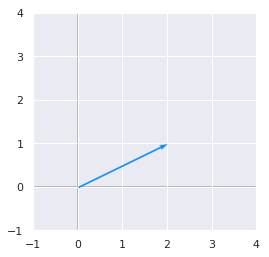

In [ ]:
plotVectors([v.flatten()], cols=['#1190FF'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)

Now, we will apply the matrix $\mathbf{A}$ to this vector and plot the old vector (light blue) and the new one (orange):

[[1]
 [2]]


(-1, 4)

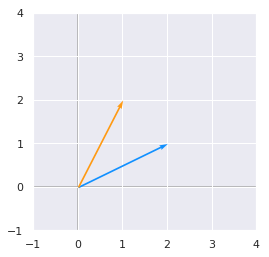

In [ ]:
Av = A.dot(v)
print(Av)
plotVectors([v.flatten(), Av.flatten()], cols=['#1190FF', '#FF9A13'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)

We can see that applying the matrix $\mathbf{A}$ has the effect of modifying the vector.

Now that you can think of matrices as linear transformation recipes, let's see the case of a very special type of vector: the eigenvector.

## Eigenvectors and eigenvalues

We have seen an example of a vector transformed by a matrix. Now imagine that the transformation of the initial vector gives us a new vector that has the exact same direction. The scale can be different but the direction is the same. Applying the matrix didn't change the direction of the vector. This special vector is called an eigenvector of the matrix. We will see that finding the eigenvectors of a matrix can be very useful.

<span class='pquote'>
    Imagine that the transformation of the initial vector by the matrix gives a new vector with the exact same direction. This vector is called an eigenvector of $\mathbf{A}$.
</span>

This means that $\mathbf{v}$ is a eigenvector of $\mathbf{A}$ if $\mathbf{v}$ and $\mathbf{Av}$ are in the same direction or to rephrase it if the vectors $\mathbf{Av}$ and $\mathbf{v}$ are parallel. The output vector is just a scaled version of the input vector. This scalling factor is $\lambda$ which is called the **eigenvalue** of $\mathbf{A}$.

$$
\mathbf{Av} = \lambda\mathbf{v}
$$

### Example 2.

Let's $\mathbf{A}$ be the following matrix:

$$
\mathbf{A}=
\begin{bmatrix}
    5 & 1\\\\
    3 & 3
\end{bmatrix}
$$

We know that one eigenvector of A is:

$$
\mathbf{v}=
\begin{bmatrix}
    1\\\\
    1
\end{bmatrix}
$$

We can check that $\mathbf{Av} = \lambda\mathbf{v}$:

$$
\begin{bmatrix}
    5 & 1\\\\
    3 & 3
\end{bmatrix}
\begin{bmatrix}
    1\\\\
    1
\end{bmatrix}=\begin{bmatrix}
    6\\\\
    6
\end{bmatrix}
$$

We can see that:

$$
6\times \begin{bmatrix}
    1\\\\
    1
\end{bmatrix} = \begin{bmatrix}
    6\\\\
    6
\end{bmatrix}
$$

which means that $\mathbf{v}$ is well an eigenvector of $\mathbf{A}$. Also, the corresponding eigenvalue is $\lambda=6$.

We can represent $\mathbf{v}$ and $\mathbf{Av}$ to check if their directions are the same:

In [ ]:
A = np.array([[5, 1], [3, 3]])
A

array([[5, 1],
       [3, 3]])

In [ ]:
v = np.array([[1], [1]])
v

array([[1],
       [1]])

(-1, 7)

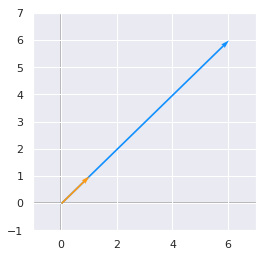

In [ ]:
Av = A.dot(v)

orange = '#FF9A13'
blue = '#1190FF'

plotVectors([Av.flatten(), v.flatten()], cols=[blue, orange])
plt.ylim(-1, 7)
plt.xlim(-1, 7)

We can see that their directions are the same!

Another eigenvector of $\mathbf{A}$ is

$$
\mathbf{v}=
\begin{bmatrix}
    1\\\\
    -3
\end{bmatrix}
$$

because

$$
\begin{bmatrix}
    5 & 1\\\\
    3 & 3
\end{bmatrix}\begin{bmatrix}
    1\\\\
    -3
\end{bmatrix} = \begin{bmatrix}
    2\\\\
    -6
\end{bmatrix}
$$

and

$$
2 \times \begin{bmatrix}
    1\\\\
    -3
\end{bmatrix} =
\begin{bmatrix}
    2\\\\
    -6
\end{bmatrix}
$$

So the corresponding eigenvalue is $\lambda=2$.

In [ ]:
v = np.array([[1], [-3]])
v

array([[ 1],
       [-3]])

(-1, 3)

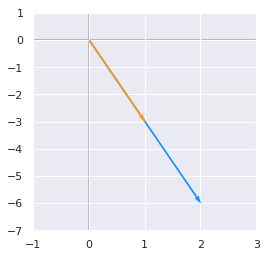

In [ ]:
Av = A.dot(v)

plotVectors([Av.flatten(), v.flatten()], cols=[blue, orange])
plt.ylim(-7, 1)
plt.xlim(-1, 3)

This example shows that the eigenvectors $\mathbf{v}$ are vectors that change only in scale when we apply the matrix $\mathbf{A}$ to them. Here the scales were 6 for the first eigenvector and 2 to the second but $\lambda$ can take any real or even complex value.

## Find eigenvalues and eigenvectors in Python

Numpy provides a function returning eigenvectors and eigenvalues (the first array corresponds to the eigenvalues and the second to the eigenvectors concatenated in columns):

```python
(array([ 6.,  2.]), array([[ 0.70710678, -0.31622777],
       [ 0.70710678,  0.9486833 ]]))
```

Here a demonstration with the preceding example.

In [ ]:
A = np.array([[5, 1], [3, 3]])
A

array([[5, 1],
       [3, 3]])

In [ ]:
np.linalg.eig(A)

(array([6., 2.]), array([[ 0.70710678, -0.31622777],
        [ 0.70710678,  0.9486833 ]]))

We can see that the eigenvalues are the same than the ones we used before: 6 and 2 (first array).

The eigenvectors correspond to the columns of the second array. This means that the eigenvector corresponding to $\lambda=6$ is:

$$
\begin{bmatrix}
    0.70710678\\\\
    0.70710678
\end{bmatrix}
$$

The eigenvector corresponding to $\lambda=2$ is:

$$
\begin{bmatrix}
    -0.31622777\\\\
    0.9486833
\end{bmatrix}
$$

The eigenvectors look different because they have not necessarly the same scaling than the ones we gave in the example. We can easily see that the first corresponds to a scaled version of our $\begin{bmatrix}
    1\\\\
    1
\end{bmatrix}$. But the same property stands. We have still $\mathbf{Av} = \lambda\mathbf{v}$:

$$
\begin{bmatrix}
    5 & 1\\\\
    3 & 3
\end{bmatrix}
\begin{bmatrix}
    0.70710678\\\\
    0.70710678
\end{bmatrix}=
\begin{bmatrix}
    4.24264069\\\\
    4.24264069
\end{bmatrix}
$$

With $0.70710678 \times 6 = 4.24264069$. So there are an infinite number of eigenvectors corresponding to the eigenvalue $6$. They are equivalent because we are interested by their directions.

For the second eigenvector we can check that it corresponds to a scaled version of $\begin{bmatrix}
    1\\\\
    -3
\end{bmatrix}$. We can draw these vectors and see if they are parallel.

(-1, 3)

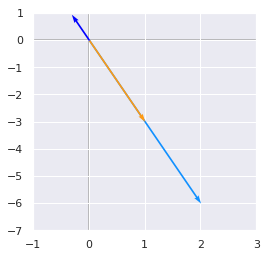

In [ ]:
v = np.array([[1], [-3]])
Av = A.dot(v)
v_np = [-0.31622777, 0.9486833]

plotVectors([Av.flatten(), v.flatten(), v_np], cols=[blue, orange, 'blue'])
plt.ylim(-7, 1)
plt.xlim(-1, 3)

We can see that the vector found with Numpy (in dark blue) is a scaled version of our preceding $\begin{bmatrix}
    1\\\\
    -3
\end{bmatrix}$.

## Rescaled vectors

As we saw it with numpy, if $\mathbf{v}$ is an eigenvector of $\mathbf{A}$, then any rescaled vector $s\mathbf{v}$ is also an eigenvector of $\mathbf{A}$. The eigenvalue of the rescaled vector is the same.

Let's try to rescale

$$
\mathbf{v}=
\begin{bmatrix}
    1\\\\
    -3
\end{bmatrix}
$$

from our preceding example. 

For instance,

$$
\mathbf{3v}=
\begin{bmatrix}
    3\\\\
    -9
\end{bmatrix}
$$

$$
\begin{bmatrix}
    5 & 1\\\\
    3 & 3
\end{bmatrix}
\begin{bmatrix}
    3\\\\
    -9
\end{bmatrix} =
\begin{bmatrix}
    6\\\\
    18
\end{bmatrix} = 2 \times
\begin{bmatrix}
    3\\\\
    -9
\end{bmatrix}
$$

We have well $\mathbf{A}\times 3\mathbf{v} = \lambda\mathbf{v}$ and the eigenvalue is still $\lambda=2$.

## Concatenating eigenvalues and eigenvectors

Now that we have an idea of what eigenvectors and eigenvalues are we can see how it can be used to decompose a matrix. All eigenvectors of a matrix $\mathbf{A}$ can be concatenated in a matrix with each column corresponding to each eigenvector (like in the second array return by `np.linalg.eig(A)`):

$$
\mathbf{V}=
\begin{bmatrix}
    1 & 1\\\\
    1 & -3
\end{bmatrix}
$$

The first column $
\begin{bmatrix}
    1\\\\
    1
\end{bmatrix}
$ corresponds to $\lambda=6$ and the second $
\begin{bmatrix}
    1\\\\
    -3
\end{bmatrix}
$ to $\lambda=2$.

The vector $\mathbf{\lambda}$ can be created from all eigenvalues:

$$
\mathbf{\lambda}=
\begin{bmatrix}
    6\\\\
    2
\end{bmatrix}
$$

Then the eigendecomposition is given by

$$
\mathbf{A}=\mathbf{V}\cdot diag(\mathbf{\lambda}) \cdot \mathbf{V}^{-1}
$$

<span class='pquote'>
    We can decompose the matrix $\mathbf{A}$ with eigenvectors and eigenvalues. It is done with: $\mathbf{A}=\mathbf{V}\cdot diag(\mathbf{\lambda}) \cdot \mathbf{V}^{-1}$
</span>

$diag(\mathbf{v})$ is a diagonal matrix (see [2.6](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.6-Special-Kinds-of-Matrices-and-Vectors/)) containing all the eigenvalues. Continuing with our example we have

$$
\mathbf{V}=\begin{bmatrix}
    1 & 1\\\\
    1 & -3
\end{bmatrix}
$$

The diagonal matrix is all zeros except the diagonal that is our vector $\mathbf{\lambda}$.

$$
diag(\mathbf{v})=
\begin{bmatrix}
    6 & 0\\\\
    0 & 2
\end{bmatrix}
$$

The inverse matrix of $\mathbf{V}$ can be calculated with numpy:

In [ ]:
V = np.array([[1, 1], [1, -3]])
V

array([[ 1,  1],
       [ 1, -3]])

In [ ]:
V_inv = np.linalg.inv(V)
V_inv

array([[ 0.75,  0.25],
       [ 0.25, -0.25]])

So let's plug

$$
\mathbf{V}^{-1}=\begin{bmatrix}
    0.75 & 0.25\\\\
    0.25 & -0.25
\end{bmatrix}
$$

into our equation:

$$
\begin{align*}
&\mathbf{V}\cdot diag(\mathbf{\lambda}) \cdot \mathbf{V}^{-1}\\\\
&=
\begin{bmatrix}
    1 & 1\\\\
    1 & -3
\end{bmatrix}
\begin{bmatrix}
    6 & 0\\\\
    0 & 2
\end{bmatrix}
\begin{bmatrix}
    0.75 & 0.25\\\\
    0.25 & -0.25
\end{bmatrix}
\end{align*}
$$

If we do the dot product of the first two matrices we have:

$$
\begin{bmatrix}
    1 & 1\\\\
    1 & -3
\end{bmatrix}
\begin{bmatrix}
    6 & 0\\\\
    0 & 2
\end{bmatrix} =
\begin{bmatrix}
    6 & 2\\\\
    6 & -6
\end{bmatrix}
$$

So with replacing into the equation:

$$
\begin{align*}
&\begin{bmatrix}
    6 & 2\\\\
    6 & -6
\end{bmatrix}
\begin{bmatrix}
    0.75 & 0.25\\\\
    0.25 & -0.25
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    6\times0.75 + (2\times0.25) & 6\times0.25 + (2\times-0.25)\\\\
    6\times0.75 + (-6\times0.25) & 6\times0.25 + (-6\times-0.25)
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    5 & 1\\\\
    3 & 3
\end{bmatrix}=
\mathbf{A}
\end{align*}
$$

Let's check our result with Python:

In [ ]:
lambdas = np.diag([6,2])
lambdas

array([[6, 0],
       [0, 2]])

In [ ]:
V.dot(lambdas).dot(V_inv)

array([[5., 1.],
       [3., 3.]])

That confirms our previous calculation. 

## Real symmetric matrix

In the case of real symmetric matrices (more details about symmetric matrices in [2.6](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.6-Special-Kinds-of-Matrices-and-Vectors/)), the eigendecomposition can be expressed as

$$
\mathbf{A} = \mathbf{Q}\Lambda \mathbf{Q}^\text{T}
$$

where $\mathbf{Q}$ is the matrix with eigenvectors as columns and $\Lambda$ is $diag(\lambda)$.

### Example 3.

$$
\mathbf{A}=\begin{bmatrix}
    6 & 2\\\\
    2 & 3
\end{bmatrix}
$$

This matrix is symmetric because $\mathbf{A}=\mathbf{A}^\text{T}$. Its eigenvectors are:

$$
\mathbf{Q}=
\begin{bmatrix}
    0.89442719 & -0.4472136\\\\
    0.4472136 & 0.89442719
\end{bmatrix}
$$

and its eigenvalues put in a diagonal matrix gives:

$$
\mathbf{\Lambda}=
\begin{bmatrix}
    7 & 0\\\\
    0 & 2
\end{bmatrix}
$$

So let's begin to calculate $\mathbf{Q\Lambda}$:

$$
\begin{align*}
\mathbf{Q\Lambda}&=
\begin{bmatrix}
    0.89442719 & -0.4472136\\\\
    0.4472136 & 0.89442719
\end{bmatrix}
\begin{bmatrix}
    7 & 0\\\\
    0 & 2
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    0.89442719 \times 7 & -0.4472136\times 2\\\\
    0.4472136 \times 7 & 0.89442719\times 2
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    6.26099033 & -0.8944272\\\\
    3.1304952 & 1.78885438
\end{bmatrix}
\end{align*}
$$

with:

$$
\mathbf{Q}^\text{T}=
\begin{bmatrix}
    0.89442719 & 0.4472136\\\\
    -0.4472136 & 0.89442719
\end{bmatrix}
$$

So we have:

$$
\begin{align*}
\mathbf{Q\Lambda} \mathbf{Q}^\text{T}&=
\begin{bmatrix}
    6.26099033 & -0.8944272\\\\
    3.1304952 & 1.78885438
\end{bmatrix}
\begin{bmatrix}
    0.89442719 & 0.4472136\\\\
    -0.4472136 & 0.89442719
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    6 & 2\\\\
    2 & 3
\end{bmatrix}
\end{align*}
$$

It works! For that reason, it can useful to use symmetric matrices! Let's do the same things easily with `linalg` from numpy:

In [ ]:
A = np.array([[6, 2], [2, 3]])
A

array([[6, 2],
       [2, 3]])

In [ ]:
eigVals, eigVecs = np.linalg.eig(A)
eigVecs

array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]])

In [ ]:
eigVals = np.diag(eigVals)
eigVals

array([[7., 0.],
       [0., 2.]])

In [ ]:
eigVecs.dot(eigVals).dot(eigVecs.T)

array([[6., 2.],
       [2., 3.]])

We can see that the result corresponds to our initial matrix.

## Quadratic form to matrix form

Eigendecomposition can be used to optimize quadratic functions. We will see that when $\mathbf{x}$ takes the values of an eigenvector, $f(\mathbf{x})$ takes the value of its corresponding eigenvalue.

<span class='pquote'>
    When $\mathbf{x}$ takes the values of an eigenvector, $f(\mathbf{x})$ takes the value of its corresponding eigenvalue.
</span>

We will see in the following points how we can show that with different methods.

Let's have the following quadratic equation:

$$
f(\mathbf{x}) = ax_1^2 +(b+c)x_1x_2 + dx_2^2
$$

These quadratic forms can be generated by matrices:

$$
f(\mathbf{x})= \begin{bmatrix}
    x_1 & x_2
\end{bmatrix}\begin{bmatrix}
    a & b\\\\
    c & d
\end{bmatrix}\begin{bmatrix}
    x_1\\\\
    x_2
\end{bmatrix} = \mathbf{x^\text{T}Ax}
$$

with:

$$
\mathbf{x} = \begin{bmatrix}
    x_1\\\\
    x_2
\end{bmatrix}
$$

and

$$
\mathbf{A}=\begin{bmatrix}
    a & b\\\\
    c & d
\end{bmatrix}
$$

We call them matrix forms. This form is useful to do various things on the quadratic equation like constrained optimization (see bellow).

<span class='pquote'>
    Quadratic equations can be expressed under the matrix form
</span>

If you look at the relation between these forms you can see that $a$ gives you the number of $x_1^2$, $(b + c)$ the number of $x_1x_2$ and $d$ the number of $x_2^2$. This means that the same quadratic form can be obtained from infinite number of matrices $\mathbf{A}$ by changing $b$ and $c$ while preserving their sum.

### Example 4.

$$
\mathbf{x} = \begin{bmatrix}
    x_1\\\\
    x_2
\end{bmatrix}
$$

and

$$
\mathbf{A}=\begin{bmatrix}
    2 & 4\\\\
    2 & 5
\end{bmatrix}
$$

gives the following quadratic form:

$$
2x_1^2 + (4+2)x_1x_2 + 5x_2^2\\\\=2x_1^2 + 6x_1x_2 + 5x_2^2
$$

but if:

$$
\mathbf{A}=\begin{bmatrix}
    2 & -3\\\\
    9 & 5
\end{bmatrix}
$$

we still have the quadratic same form:

$$
2x_1^2 + (-3+9)x_1x_2 + 5x_2^2\\\\=2x_1^2 + 6x_1x_2 + 5x_2^2
$$

### Example 5

For this example, we will go from the matrix form to the quadratic form using a symmetric matrix $\mathbf{A}$. Let's use the matrix of the example 3.

$$
\mathbf{x} = \begin{bmatrix}
    x_1\\\\
    x_2
\end{bmatrix}
$$

and

$$\mathbf{A}=\begin{bmatrix}
    6 & 2\\\\
    2 & 3
\end{bmatrix}
$$

$$
\begin{align*}
\mathbf{x^\text{T}Ax}&=
\begin{bmatrix}
    x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
    6 & 2\\\\
    2 & 3
\end{bmatrix}
\begin{bmatrix}
    x_1\\\\
    x_2
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
    6 x_1 + 2 x_2\\\\
    2 x_1 + 3 x_2
\end{bmatrix}\\\\
&=
x_1(6 x_1 + 2 x_2) + x_2(2 x_1 + 3 x_2)\\\\
&=
6 x_1^2 + 4 x_1x_2 + 3 x_2^2
\end{align*}
$$

Our quadratic equation is thus $6 x_1^2 + 4 x_1x_2 + 3 x_2^2$.

### Note

If $\mathbf{A}$ is a diagonal matrix (all 0 except the diagonal), the quadratic form of $\mathbf{x^\text{T}Ax}$ will have no cross term. Take the following matrix form:

$$
\mathbf{A}=\begin{bmatrix}
    a & b\\\\
    c & d
\end{bmatrix}
$$

If $\mathbf{A}$ is diagonal, then $b$ and $c$ are 0 and since $f(\mathbf{x}) = ax_1^2 +(b+c)x_1x_2 + dx_2^2$ there is no cross term. A quadratic form without cross term is called diagonal form since it comes from a diagonal matrix.

## Change of variable 

A change of variable (or linear substitution) simply means that we replace a variable by another one. We will see that it can be used to remove the cross terms in our quadratic equation. Without the cross term, it will then be easier to characterize the function and eventually optimize it (i.e finding its maximum or minimum).

## With the quadratic form

### Example 6.

Let's take again our previous quadratic form:

$$
\mathbf{x^\text{T}Ax} = 6 x_1^2 + 4 x_1x_2 + 3 x_2^2
$$

The change of variable will concern $x_1$ and $x_2$. We can replace $x_1$ with any combination of $y_1$ and $y_2$ and $x_2$ with any combination $y_1$ and $y_2$. We will of course end up with a new equation. The nice thing is that we can find a specific substitution that will lead to a simplification of our statement. Specifically, it can be used to get rid of the cross term (in our example: $4 x_1x_2$). We will see later why it is interesting.

Actually, the right substitution is given by the eigenvectors of the matrix used to generate the quadratic form. Let's recall that the matrix form of our equation is:

$$
\mathbf{x} = \begin{bmatrix}
    x_1\\\\
    x_2
\end{bmatrix}
$$

and

$$\mathbf{A}=\begin{bmatrix}
    6 & 2\\\\
    2 & 3
\end{bmatrix}
$$

and that the eigenvectors of $\mathbf{A}$ are:

$$
\begin{bmatrix}
    0.89442719 & -0.4472136\\\\
    0.4472136 & 0.89442719
\end{bmatrix}
$$

With the purpose of simplification, we can replace these values with:

$$
\begin{bmatrix}
    \frac{2}{\sqrt{5}} & -\frac{1}{\sqrt{5}}\\\\
    \frac{1}{\sqrt{5}} & \frac{2}{\sqrt{5}}
\end{bmatrix} =
\frac{1}{\sqrt{5}}
\begin{bmatrix}
    2 & -1\\\\
    1 & 2
\end{bmatrix}
$$

So our first eigenvector is:

$$
\frac{1}{\sqrt{5}}
\begin{bmatrix}
    2\\\\
    1
\end{bmatrix}
$$

and our second eigenvector is:

$$
\frac{1}{\sqrt{5}}
\begin{bmatrix}
    -1\\\\
    2
\end{bmatrix}
$$

The change of variable will lead to:

$$
\begin{bmatrix}
    x_1\\\\
    x_2
\end{bmatrix} =
\frac{1}{\sqrt{5}}
\begin{bmatrix}
    2 & -1\\\\
    1 & 2
\end{bmatrix}
\begin{bmatrix}
    y_1\\\\
    y_2
\end{bmatrix} =
\frac{1}{\sqrt{5}}
\begin{bmatrix}
    2y_1 - y_2\\\\
    y_1 + 2y_2
\end{bmatrix}
$$

so we have

$$
\begin{cases}
x_1 = \frac{1}{\sqrt{5}}(2y_1 - y_2)\\\\
x_2 = \frac{1}{\sqrt{5}}(y_1 + 2y_2)
\end{cases}
$$

So far so good! Let's replace that in our example:

$$
\begin{align*}
\mathbf{x^\text{T}Ax}
&=
6 x_1^2 + 4 x_1x_2 + 3 x_2^2\\\\
&=
6 [\frac{1}{\sqrt{5}}(2y_1 - y_2)]^2 + 4 [\frac{1}{\sqrt{5}}(2y_1 - y_2)\frac{1}{\sqrt{5}}(y_1 + 2y_2)] + 3 [\frac{1}{\sqrt{5}}(y_1 + 2y_2)]^2\\\\
&=
\frac{1}{5}[6 (2y_1 - y_2)^2 + 4 (2y_1 - y_2)(y_1 + 2y_2) + 3 (y_1 + 2y_2)^2]\\\\
&=
\frac{1}{5}[6 (4y_1^2 - 4y_1y_2 + y_2^2) + 4 (2y_1^2 + 4y_1y_2 - y_1y_2 - 2y_2^2) + 3 (y_1^2 + 4y_1y_2 + 4y_2^2)]\\\\
&=
\frac{1}{5}(24y_1^2 - 24y_1y_2 + 6y_2^2 + 8y_1^2 + 16y_1y_2 - 4y_1y_2 - 8y_2^2 + 3y_1^2 + 12y_1y_2 + 12y_2^2)\\\\
&=
\frac{1}{5}(35y_1^2 + 10y_2^2)\\\\
&=
7y_1^2 + 2y_2^2
\end{align*}
$$

That's great! Our new equation doesn't have any cross terms!

## With the Principal Axes Theorem

Actually there is a simpler way to do the change of variable. We can stay in the matrix form. Recall that we start with the form:

<div>
$$
f(\mathbf{x})=\mathbf{x^\text{T}Ax}
$$
</div>

The linear substitution can be wrote in these terms. We want replace the variables $\mathbf{x}$ by $\mathbf{y}$ that relates by:

<div>
$$
\mathbf{x}=P\mathbf{y}
$$
</div>

We want to find $P$ such as our new equation (after the change of variable) doesn't contain the cross terms. The first step is to replace that in the first equation:

<div>
$$
\begin{align*}
\mathbf{x^\text{T}Ax}
&=
(\mathbf{Py})^\text{T}\mathbf{A}(\mathbf{Py})\\\\
&=
\mathbf{y}^\text{T}(\mathbf{P}^\text{T}\mathbf{AP})\mathbf{y}
\end{align*}
$$
</div>

Can you see the how to transform the left hand side ($\mathbf{x}$) into the right hand side ($\mathbf{y}$)? The substitution is done by replacing $\mathbf{A}$ with $\mathbf{P^\text{T}AP}$. We also know that $\mathbf{A}$ is symmetric and thus that there is a diagonal matrix $\mathbf{D}$ containing the eigenvectors of $\mathbf{A}$ and such as $\mathbf{D}=\mathbf{P}^\text{T}\mathbf{AP}$. We thus end up with:

<div>
$$
\mathbf{x^\text{T}Ax}=\mathbf{y^\text{T}\mathbf{D} y}
$$
</div>

<span class='pquote'>
    We can use $\mathbf{D}$ to simplify our quadratic equation and remove the cross terms
</span>

All of this implies that we can use $\mathbf{D}$ to simplify our quadratic equation and remove the cross terms. If you remember from example 2 we know that the eigenvalues of $\mathbf{A}$ are:

<div>
$$
\mathbf{D}=
\begin{bmatrix}
    7 & 0\\\\
    0 & 2
\end{bmatrix}
$$
</div>

<div>
$$
\begin{align*}
\mathbf{x^\text{T}Ax}
&=
\mathbf{y^\text{T}\mathbf{D} y}\\\\
&=
\mathbf{y}^\text{T}
\begin{bmatrix}
    7 & 0\\\\
    0 & 2
\end{bmatrix}
\mathbf{y}\\\\
&=
\begin{bmatrix}
    y_1 & y_2
\end{bmatrix}
\begin{bmatrix}
    7 & 0\\\\
    0 & 2
\end{bmatrix}
\begin{bmatrix}
    y_1\\\\
    y_2
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    7y_1 +0y_2 & 0y_1 + 2y_2
\end{bmatrix}
\begin{bmatrix}
    y_1\\\\
    y_2
\end{bmatrix}\\\\
&=
7y_1^2 + 2y_2^2
\end{align*}
$$
</div>

That's nice! If you look back to the change of variable that we have done in the quadratic form, you will see that we have found the same values!

This form (without cross-term) is called the **principal axes form**.

### Summary

To summarise, the principal axes form can be found with

$$
\mathbf{x^\text{T}Ax} = \lambda_1y_1^2 + \lambda_2y_2^2
$$

where $\lambda_1$ is the eigenvalue corresponding to the first eigenvector and $\lambda_2$ the eigenvalue corresponding to the second eigenvector (second column of $\mathbf{x}$).

## Finding f(x) with eigendecomposition

We will see that there is a way to find $f(\mathbf{x})$ with eigenvectors and eigenvalues when $\mathbf{x}$ is a unit vector. 

Let's start from:

$$
f(\mathbf{x}) =\mathbf{x^\text{T}Ax}
$$

We know that if $\mathbf{x}$ is an eigenvector of $\mathbf{A}$ and $\lambda$ the corresponding eigenvalue, then $
\mathbf{Ax}=\lambda \mathbf{x}
$. By replacing the term in the last equation we have:

$$
f(\mathbf{x}) =\mathbf{x^\text{T}\lambda x} = \mathbf{x^\text{T}x}\lambda
$$

Since $\mathbf{x}$ is a unit vector, $\norm{\mathbf{x}}_2=1$ and $\mathbf{x^\text{T}x}=1$ (cf. [2.5](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.5-Norms/) Norms). We end up with

$$
f(\mathbf{x}) = \lambda
$$

This is a usefull property. If $\mathbf{x}$ is an eigenvector of $\mathbf{A}$, $
f(\mathbf{x}) =\mathbf{x^\text{T}Ax}$ will take the value of the corresponding eigenvalue. We can see that this is working only if the euclidean norm of $\mathbf{x}$ is 1 (i.e $\mathbf{x}$ is a unit vector).

### Example 7

This example will show that $f(\mathbf{x}) = \lambda$. Let's take again the last example, the eigenvectors of $\mathbf{A}$ were

$$
\mathbf{Q}=
\begin{bmatrix}
    0.89442719 & -0.4472136\\\\
    0.4472136 & 0.89442719
\end{bmatrix}
$$

and the eigenvalues

$$
\mathbf{\Lambda}=
\begin{bmatrix}
    7 & 0\\\\
    0 & 2
\end{bmatrix}
$$

So if:

$$
\mathbf{x}=\begin{bmatrix}
    0.89442719 & 0.4472136
\end{bmatrix}
$$

$f(\mathbf{x})$ should be equal to 7. Let's check that's true.

$$
\begin{align*}
f(\mathbf{x}) &= 6 x_1^2 + 4 x_1x_2 + 3 x_2^2\\\\
&= 6\times 0.89442719^2 + 4\times 0.89442719\times 0.4472136 + 3 \times 0.4472136^2\\\\
&= 7
\end{align*}
$$

In the same way, if $\mathbf{x}=\begin{bmatrix}
    -0.4472136 & 0.89442719
\end{bmatrix}$, $f(\mathbf{x})$ should be equal to 2.

$$
\begin{align*}
f(\mathbf{x}) &= 6 x_1^2 + 4 x_1x_2 + 3 x_2^2\\\\
&= 6\times -0.4472136^2 + 4\times -0.4472136\times 0.89442719 + 3 \times 0.89442719^2\\\\
&= 2
\end{align*}
$$

## Quadratic form optimization

Depending to the context, optimizing a function means finding its maximum or its minimum. It is for instance widely used to minimize the error of cost functions in machine learning.

Here we will see how eigendecomposition can be used to optimize quadratic functions and why this can be done easily without cross terms. The difficulty is that we want a constrained optimization, that is to find the minimum or the maximum of the function for $f(\mathbf{x})$ being a unit vector.

### Example 7.

We want to optimize:

$$
f(\mathbf{x}) =\mathbf{x^\text{T}Ax} \textrm{ subject to }||\mathbf{x}||_2= 1
$$

In our last example we ended up with:

$$
f(\mathbf{x}) = 7y_1^2 + 2y_2^2
$$

And the constraint of $\mathbf{x}$ being a unit vector imply:

$$
||\mathbf{x}||_2 = 1 \Leftrightarrow x_1^2 + x_2^2 = 1
$$

We can also show that $\mathbf{y}$ has to be a unit vector if it is the case for $\mathbf{x}$. Recall first that $\mathbf{x}=\mathbf{Py}$:

$$
\begin{align*}
||\mathbf{x}||^2 &= \mathbf{x^\text{T}x}\\\\
&= (\mathbf{Py})^\text{T}(\mathbf{Py})\\\\
&= \mathbf{P^\text{T}y^\text{T}Py}\\\\
&= \mathbf{PP^\text{T}y^\text{T}y}\\\\
&= \mathbf{y^\text{T}y} = ||\mathbf{y}||^2
\end{align*}
$$

So $\norm{\mathbf{x}}^2 = \norm{\mathbf{y}}^2 = 1$ and thus $y_1^2 + y_2^2 = 1$

Since $y_1^2$ and $y_2^2$ cannot be negative because they are squared values, we can be sure that $2y_2^2\leq7y_2^2$. Hence:

$$
\begin{align*}
f(\mathbf{x}) &= 7y_1^2 + 2y_2^2\\\\
&\leq
7y_1^2 + 7y_2^2\\\\
&=
7(y_1^2+y_2^2)\\\\
&=
7
\end{align*}
$$

This means that the maximum value of $f(\mathbf{x})$ is 7.

The same way can lead to find the minimum of $f(\mathbf{x})$. $7y_1^2\geq2y_1^2$ and:

$$
\begin{align*}
f(\mathbf{x}) &= 7y_1^2 + 2y_2^2\\\\
&\geq
2y_1^2 + 2y_2^2\\\\
&=
2(y_1^2+y_2^2)\\\\
&=
2
\end{align*}
$$

And the minimum of $f(\mathbf{x})$ is 2.

### Summary

We can note that the minimum of $f(\mathbf{x})$ is the minimum eigenvalue of the corresponding matrix $\mathbf{A}$. Another useful fact is that this value is obtained when $\mathbf{x}$ takes the value of the corresponding eigenvector (check back the preceding paragraph). In that way, $f(\mathbf{x})=7$ when $\mathbf{x}=\begin{bmatrix}0.89442719 & 0.4472136\end{bmatrix}$. This shows how useful are the eigenvalues and eigenvector in this kind of constrained optimization.

## Graphical views

We saw that the quadratic functions $f(\mathbf{x}) = ax_1^2 +2bx_1x_2 + cx_2^2$ can be represented by the symmetric matrix $\mathbf{A}$:

$$
\mathbf{A}=\begin{bmatrix}
    a & b\\\\
    b & c
\end{bmatrix}
$$

Graphically, these functions can take one of three general shapes (click on the links to go to the Surface Plotter and move the shapes):

1.[Positive-definite form](https://academo.org/demos/3d-surface-plotter/?expression=x*x%2By*y&xRange=-50%2C+50&yRange=-50%2C+50&resolution=49) | 2.[Negative-definite form](https://academo.org/demos/3d-surface-plotter/?expression=-x*x-y*y&xRange=-50%2C+50&yRange=-50%2C+50&resolution=25) | 3.[Indefinite form](https://academo.org/demos/3d-surface-plotter/?expression=x*x-y*y&xRange=-50%2C+50&yRange=-50%2C+50&resolution=49)
:-------------------------:|:-------------------------:|:-------:
<img src="https://ximera.osu.edu/mklynn2/multivariable/content/04_2_quadratic_forms/graphics/CalcPlot3D-pos_def.png" alt="Quadratic function with a positive definite form" title="Quadratic function with a positive definite form"> | <img src="https://ximera.osu.edu/mklynn2/multivariable/content/04_2_quadratic_forms/graphics/CalcPlot3D-neg_def.png" alt="Quadratic function with a negative definite form" title="Quadratic function with a negative definite form"> | <img src="https://ximera.osu.edu/mklynn2/multivariable/content/04_2_quadratic_forms/graphics/CalcPlot3D-indef.png" alt="Quadratic function with a indefinite form" title="Quadratic function with a indefinite form">



With the constraints that $\mathbf{x}$ is a unit vector, the minimum of the function $f(\mathbf{x})$ corresponds to the smallest eigenvalue and is obtained with its corresponding eigenvector. The maximum corresponds to the biggest eigenvalue and is obtained with its corresponding eigenvector.